## Retrain on the optimal pairs

### Prepare the data and metadata
Given images and captions

In [ ]:
!pip install natsort

In [18]:
import json
from glob import glob 
from natsort import natsorted

imgs_paths = natsorted(glob("../optimal_pairs/*.png"))

def txt_to_json(input_file, output_file):

    with open(input_file, 'r') as file:
        with open(output_file, 'w') as json_file:
            for im, line in zip(imgs_paths, file):
                image_class, description = line.strip().split(';  ', 1)
                image_name = im.split('/')[-1]

                data = {"file_name": image_name, "text": description}
                
                json.dump(data, json_file)
                json_file.write('\n')  # Add a newline between entries

txt_to_json('../generated_prompts.txt', '../optimal_pairs/metadata.jsonl')

#### optimal pairs 4

In [ ]:
import json
from glob import glob 
from natsort import natsorted

imgs_paths = natsorted(glob("../optimal_pairs4/*.png"))

def txt_to_json(input_file, output_file):

    with open(input_file, 'r') as file:
        with open(output_file, 'w') as json_file:
            for im, line in zip(imgs_paths, file):
                image_class, description = line.strip().split(';  ', 1)
                image_name = im.split('/')[-1]

                data = {"file_name": image_name, "text": description}
                
                json.dump(data, json_file)
                json_file.write('\n')  # Add a newline between entries

txt_to_json('../generated_prompts.txt', '../optimal_pairs4/metadata.jsonl')

## Retrain 
Using bash script [retrain_custom_ds](./retrain_custom_ds.sh), detailed explanation in [readme_txt2im](../txt2im/readme_txt2im.md)  

In [19]:
!bash retrain_custom_ds.sh

02/29/2024 11:01:22 - INFO - __main__ - Distributed environment: MULTI_GPU  Backend: nccl
Num processes: 2
Process index: 0
Local process index: 0
Device: cuda:0

Mixed precision type: fp16

02/29/2024 11:01:22 - INFO - __main__ - Distributed environment: MULTI_GPU  Backend: nccl
Num processes: 2
Process index: 1
Local process index: 1
Device: cuda:1

Mixed precision type: fp16

{'dynamic_thresholding_ratio', 'sample_max_value', 'thresholding', 'variance_type', 'clip_sample_range', 'rescale_betas_zero_snr', 'timestep_spacing'} was not found in config. Values will be initialized to default values.
{'latents_mean', 'scaling_factor', 'latents_std', 'force_upcast'} was not found in config. Values will be initialized to default values.
{'transformer_layers_per_block', 'class_embed_type', 'time_embedding_type', 'attention_type', 'addition_time_embed_dim', 'resnet_time_scale_shift', 'time_cond_proj_dim', 'reverse_transformer_layers_per_block', 'mid_block_type', 'dropout', 'timestep_post_act',

### Inference test

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

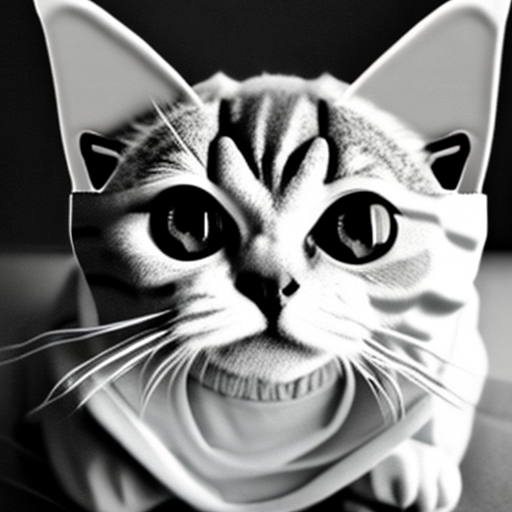

In [20]:
from diffusers import StableDiffusionPipeline
import torch

model_path = "./sd_optim_pairs_test"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

image = pipe(prompt="yoda cat").images[0]
# image.save("yoda-retrain.png")

image

### Compare test

In [22]:
from diffusers import StableDiffusionPipeline
import torch

# promptest = "A brown bear standing on a rocky cliff, watching a family of elk graze in a lush, green meadow. The bear's fur is dark and damp, and its eyes are fixed on the elk. Behind the bear, a dense forest of deciduous trees stretches up the hillside, and a family of bald eagles soars overhead."
# promptest = "Photorealistic, polar bear mother and her three cubs huddled together on a chunk of ice in the Arctic sea. The mother bear's thick, white fur is covered in snow and ice, and her sharp claws dig into the ice. The cubs' fur is soft and white, and they cling to their mother for warmth. In the background, a family of seals lounges on the ice."
promptest = "Horse, bear and horse standing next to each other, background sunset"
pipe1 = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float16)
pipe1.to("cuda")
generator = torch.Generator('cuda:0').manual_seed(1024)
image1 = pipe1(prompt=promptest, generator = generator).images[0]

retrained_model_path = "./sd_optim_pairs_test"
pipe2 = StableDiffusionPipeline.from_pretrained(retrained_model_path, torch_dtype=torch.float16)
pipe2.to("cuda")
image2 = pipe2(prompt=promptest, generator = generator).images[0]

retrained_model_path_v3 = "./sd_optim_pairs3_2500"
pipe3 = StableDiffusionPipeline.from_pretrained(retrained_model_path_v3, torch_dtype=torch.float16)
pipe3.to("cuda")
image3 = pipe3(prompt=promptest, generator = generator).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

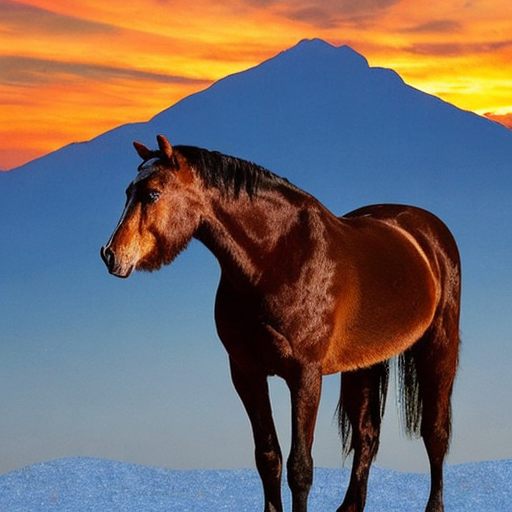

In [23]:
image1

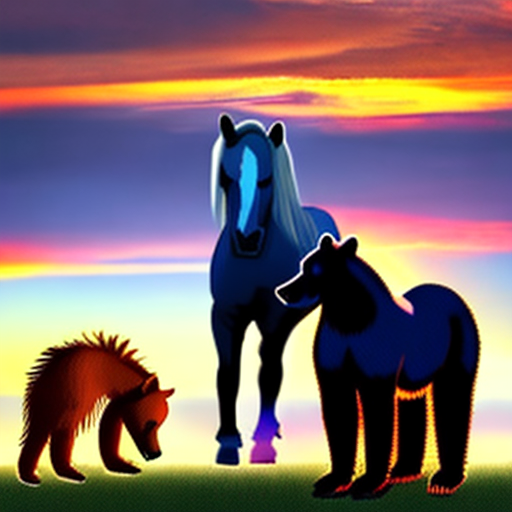

In [24]:
image2

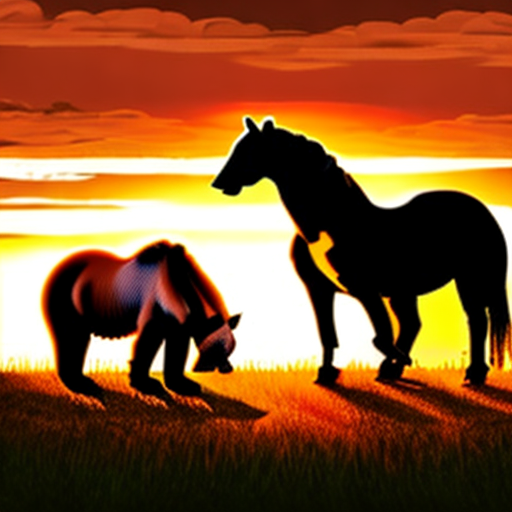

In [25]:
image3

source

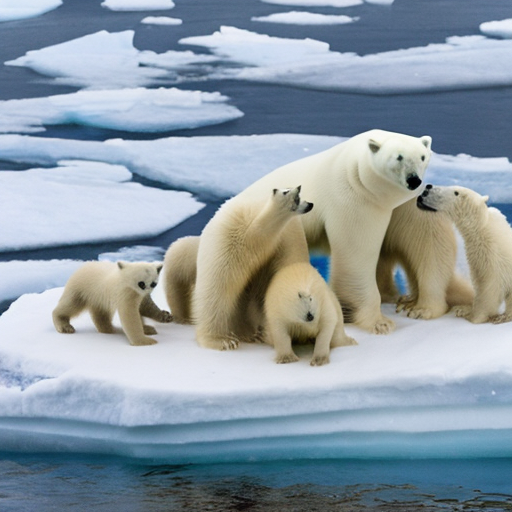

In [9]:
import PIL

PIL.Image.open("../optimal_pairs/149_bear.png")

In [1]:
prompt2 = "Red tabby cat, sitting on a sunlit windowsill, looking out at a lush green garden. background: tulips in full bloom, bees hovering around, a blue bird perched on a garden gnome."

from diffusers import StableDiffusionPipeline
import torch

# prompt2 = "A brown bear standing on a rocky cliff, watching a family of elk graze in a lush, green meadow. The bear's fur is dark and damp, and its eyes are fixed on the elk. Behind the bear, a dense forest of deciduous trees stretches up the hillside, and a family of bald eagles soars overhead."
pipe1 = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float16)
pipe1.to("cuda")
image1 = pipe1(prompt=prompt2).images[0]

retrained_model_path = "./sd_optim_pairs_test"
pipe2 = StableDiffusionPipeline.from_pretrained(retrained_model_path, torch_dtype=torch.float16)
pipe2.to("cuda")
image2 = pipe2(prompt=prompt2).images[0]

retrained_model_path_v3 = "./sd_optim_pairs3_2500"
pipe3 = StableDiffusionPipeline.from_pretrained(retrained_model_path_v3, torch_dtype=torch.float16)
pipe3.to("cuda")
image3 = pipe3(prompt=prompt2).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

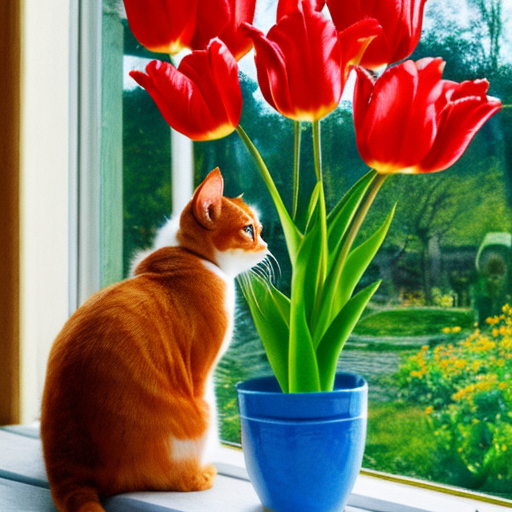

In [2]:
image1

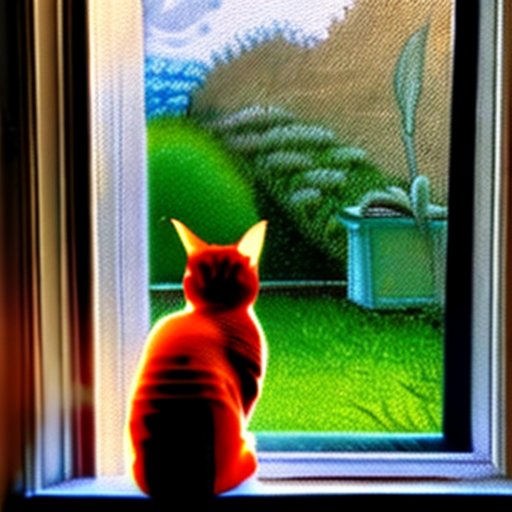

In [3]:
image2

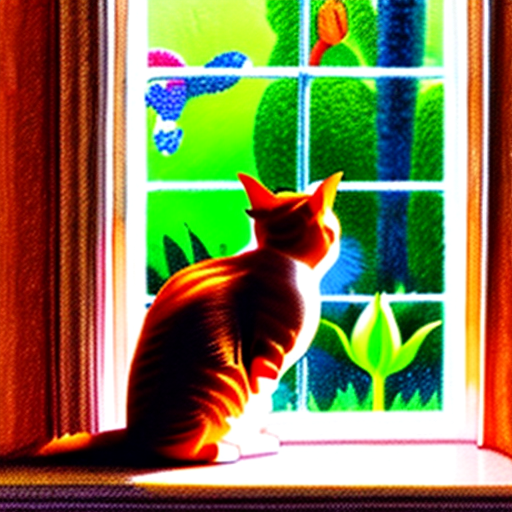

In [4]:
image3